# Analysis of Income Data

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation

# Task 1

In [2]:


data = pd.read_excel('DS1_C5_S1_Income_Data_Challenge.xlsx')

df = pd.DataFrame(data)
df

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,40,United-States,<=50K
1,50,Self-emp,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,20,United-States,<=50K


In [3]:
# Display column names

df.columns

Index(['Age', 'WorkClass', 'Education', 'Education_Num', 'Marital_Status',
       'Occupation', 'Relationship', 'Gender', 'Hours_Per_Week',
       'Native_Country', 'Income_Bracket'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Education       32561 non-null  object
 3   Education_Num   32561 non-null  int64 
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Hours_Per_Week  32561 non-null  int64 
 9   Native_Country  32561 non-null  object
 10  Income_Bracket  32561 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [5]:
# Display count of missing values

df.isnull().sum()

Age               0
WorkClass         0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

No Null Values!!!

# Task 2

In [6]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 73:       # nunique:  returns unique values in the column,
                                                    #here 73 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  --------------
WorkClass       Age
Education       Hours_Per_Week
Education_Num
Marital_Status
Occupation
Relationship
Gender
Native_Country
Income_Bracket


# Task 3

# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

### User-defined function for level 1 analysis of categorical columns
This function will check for the following: \
Unique values \
Mode \
Total count of missing values 

In [7]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
      

## 1. Analysis of WorkClass Column

In [8]:
info_of_cat("WorkClass")

Unique values in WorkClass are: [' State-gov' 'Self-emp' ' Private' ' Federal-gov' ' Local-gov' ' ?'
 ' Self-emp' ' Without-pay' ' Never-worked']
Mode of WorkClass is  Private
Number of missing values in WorkClass is 0


## 2. Analysis of Education Column

In [9]:
info_of_cat("Education")

Unique values in Education are: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Mode of Education is  HS-grad
Number of missing values in Education is 0


## 3. Analysis of Education Number Column

In [10]:
info_of_cat("Education_Num")

Unique values in Education_Num are: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Mode of Education_Num is 9
Number of missing values in Education_Num is 0


## 4. Analysis of Marital Status Column

In [11]:
info_of_cat("Marital_Status")

Unique values in Marital_Status are: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Mode of Marital_Status is  Married-civ-spouse
Number of missing values in Marital_Status is 0


## 5. Analysis of Occupation Column

In [12]:
info_of_cat("Occupation")

Unique values in Occupation are: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Mode of Occupation is  Prof-specialty
Number of missing values in Occupation is 0


## 6. Analysis of Relationship Column

In [13]:
info_of_cat("Relationship")

Unique values in Relationship are: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Mode of Relationship is  Husband
Number of missing values in Relationship is 0


## 7. Analysis of Gender Column

In [14]:
info_of_cat("Gender")

Unique values in Gender are: [' Male' ' Female']
Mode of Gender is  Male
Number of missing values in Gender is 0


## 8. Analysis of Native Country Column

In [15]:
info_of_cat("Native_Country")

Unique values in Native_Country are: [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
Mode of Native_Country is  United-States
Number of missing values in Native_Country is 0


## 9. Analysis of Income Bracket Column

In [16]:
info_of_cat("Income_Bracket")

Unique values in Income_Bracket are: [' <=50K' ' >50K']
Mode of Income_Bracket is  <=50K
Number of missing values in Income_Bracket is 0


# Task 4

# $$\;\;\;\;Univariate \ Analysis \ of \ Categorical \ Variables \ Using Graphs$$

## 1.  Visual presentation of Workclass attribute


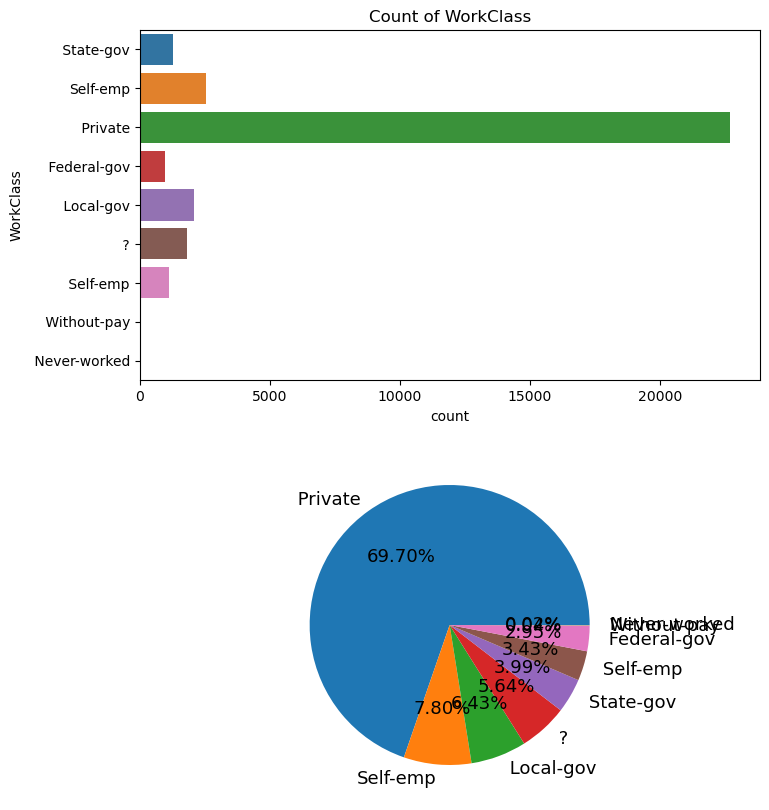

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
ax[0].set_title("Count of WorkClass")                  
percentage = df["WorkClass"].value_counts()         
labels = list(df["WorkClass"].value_counts().index)


sns.countplot(y = df["WorkClass"], ax = ax[0])

plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})   

plt.show()

#### Highest number of Workclass lies in Private Sector followed by Self Employed and Local government.

## 2.  Visual presentation of Education attribute


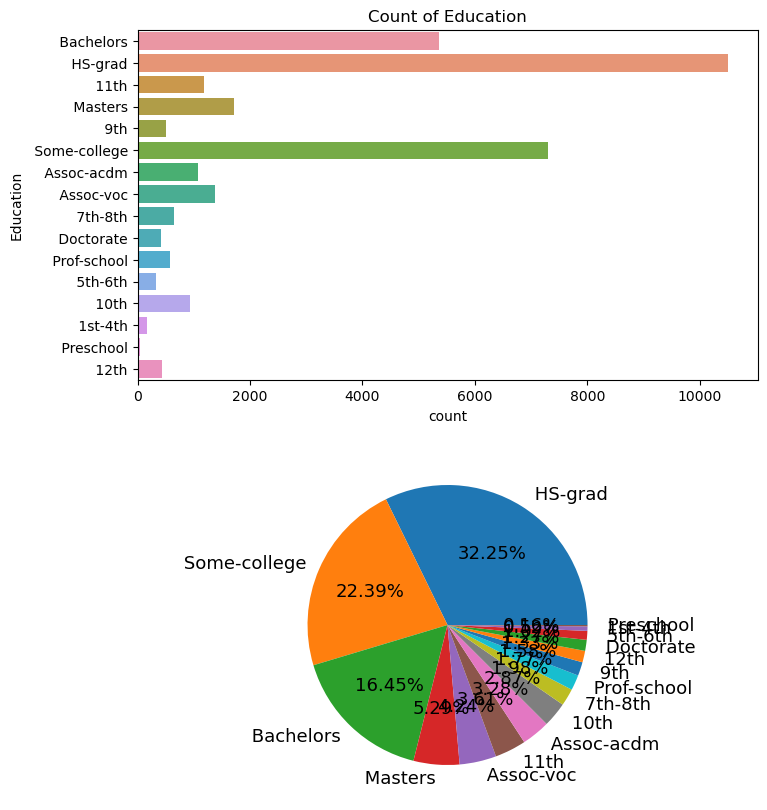

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
ax[0].set_title("Count of Education")                  
percentage = df["Education"].value_counts()         
labels = list(df["Education"].value_counts().index) 

sns.countplot(y = df["Education"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})   
plt.show()

#### More number of employees are High School Graduates with least being 1-4th Standard.

## 3.  Visual presentation of Education Number attribute


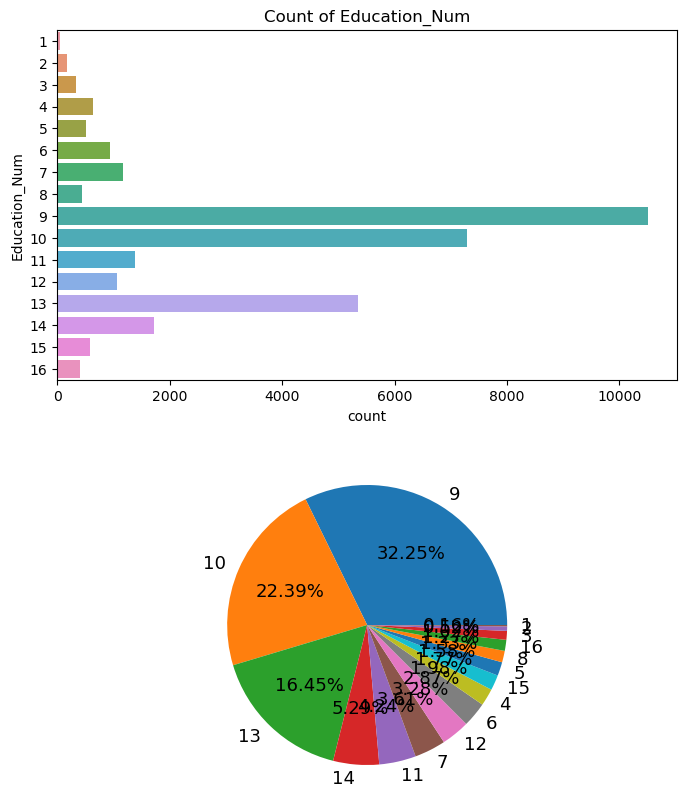

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
ax[0].set_title("Count of Education_Num")                  
percentage = df["Education_Num"].value_counts()         
labels = list(df["Education_Num"].value_counts().index) 

sns.countplot(y = df["Education_Num"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})   
plt.show()

#### More number of employees have their education number as '9' followed by '10' and '13'.

## 4.  Visual presentation of Marital Status attribute

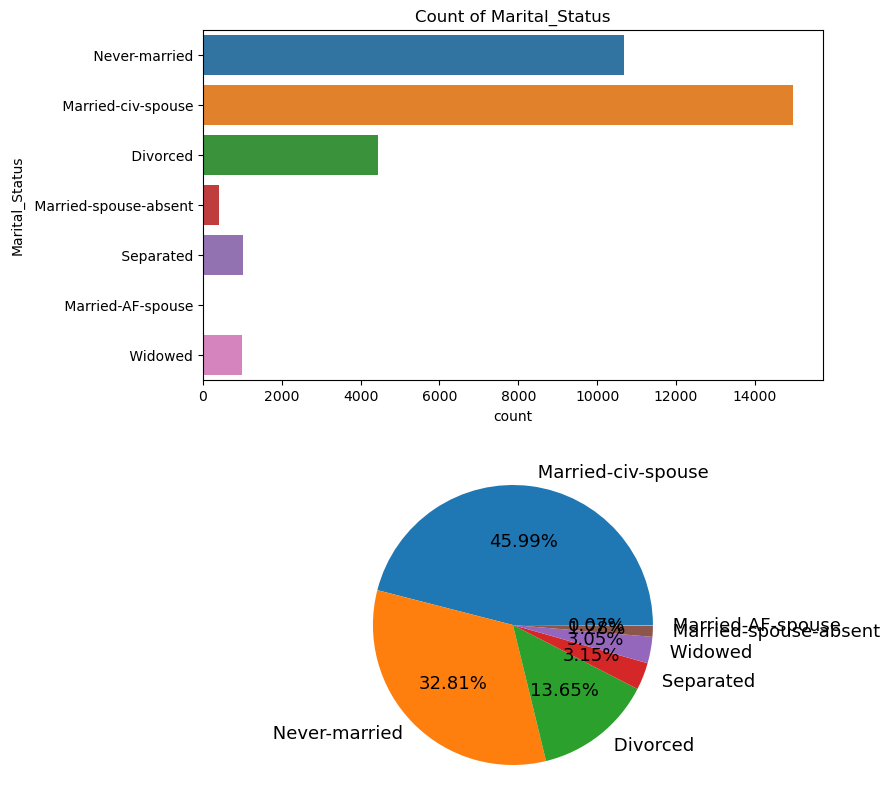

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
ax[0].set_title("Count of Marital_Status")                  
percentage = df["Marital_Status"].value_counts()         
labels = list(df["Marital_Status"].value_counts().index) 

sns.countplot(y = df["Marital_Status"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})   
plt.show()

#### Dataset suggests that higher number of employees fall under Married, Never Married and Divorced category respectively.

## 5.  Visual presentation of Occupation attribute

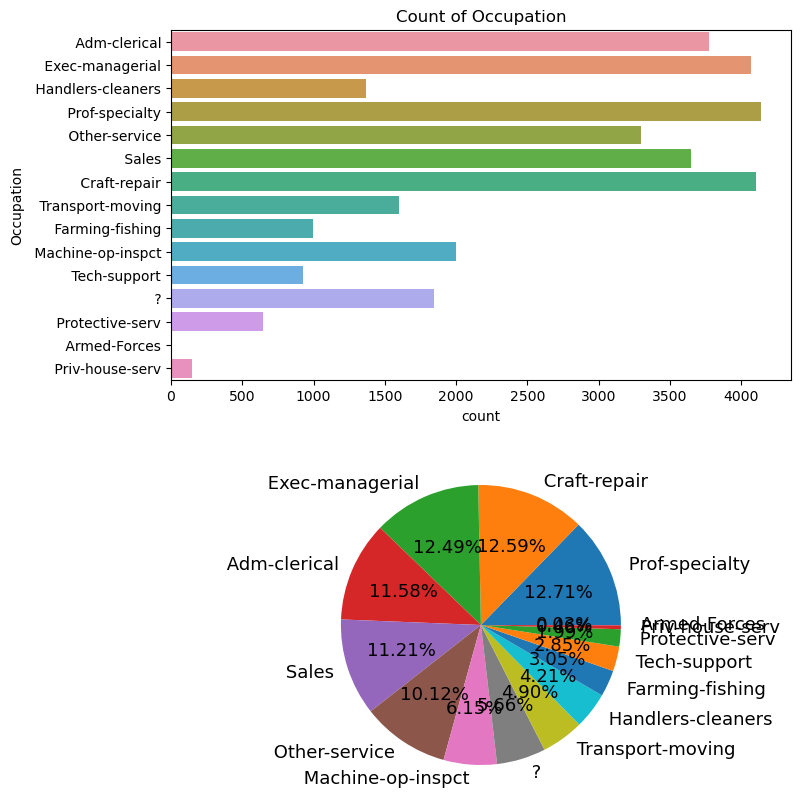

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
ax[0].set_title("Count of Occupation")                  
percentage = df["Occupation"].value_counts()         
labels = list(df["Occupation"].value_counts().index) 

sns.countplot(y = df["Occupation"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})   
plt.show()

#### Employees Occupation type is higher in Professional Speciality, Executive Managerial and Craft Repair categories

## 6.  Visual presentation of Relationship attribute

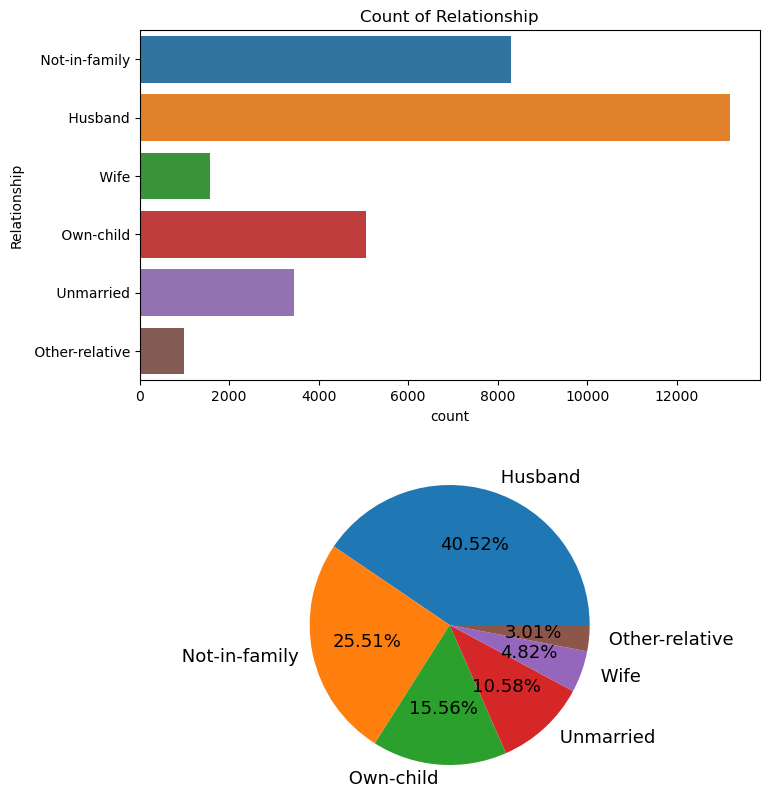

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
ax[0].set_title("Count of Relationship")                  
percentage = df["Relationship"].value_counts()         
labels = list(df["Relationship"].value_counts().index) 

sns.countplot(y = df["Relationship"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})   
plt.show()

#### More number of employees fall under Husband category contributing to 40.52%.

## 7.  Visual presentation of Gender attribute

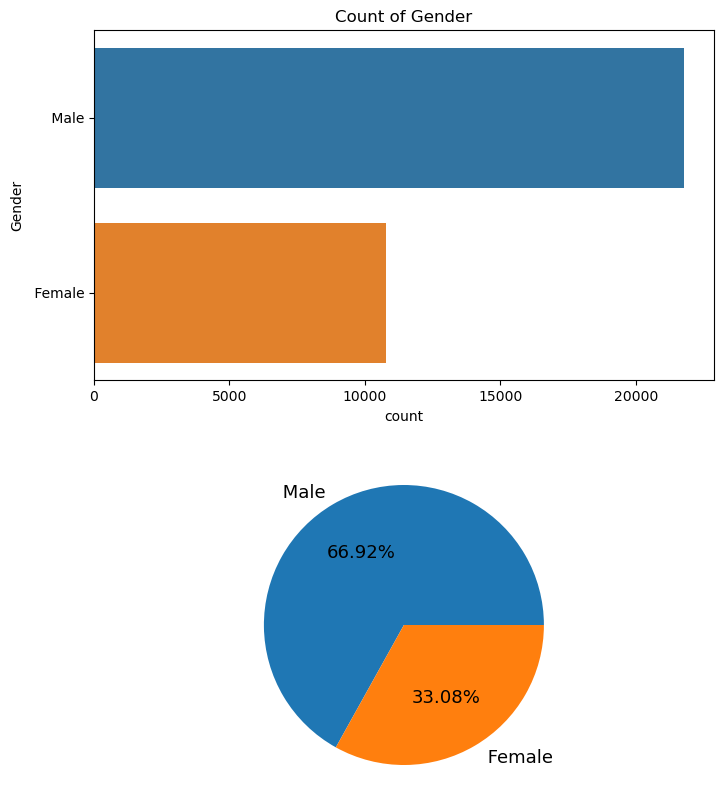

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
ax[0].set_title("Count of Gender")                  
percentage = df["Gender"].value_counts()         
labels = list(df["Gender"].value_counts().index) 

sns.countplot(y = df["Gender"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})   
plt.show()

#### Male employees contribute to 66.92% of the work force.

## 8.  Visual presentation of Native Country attribute

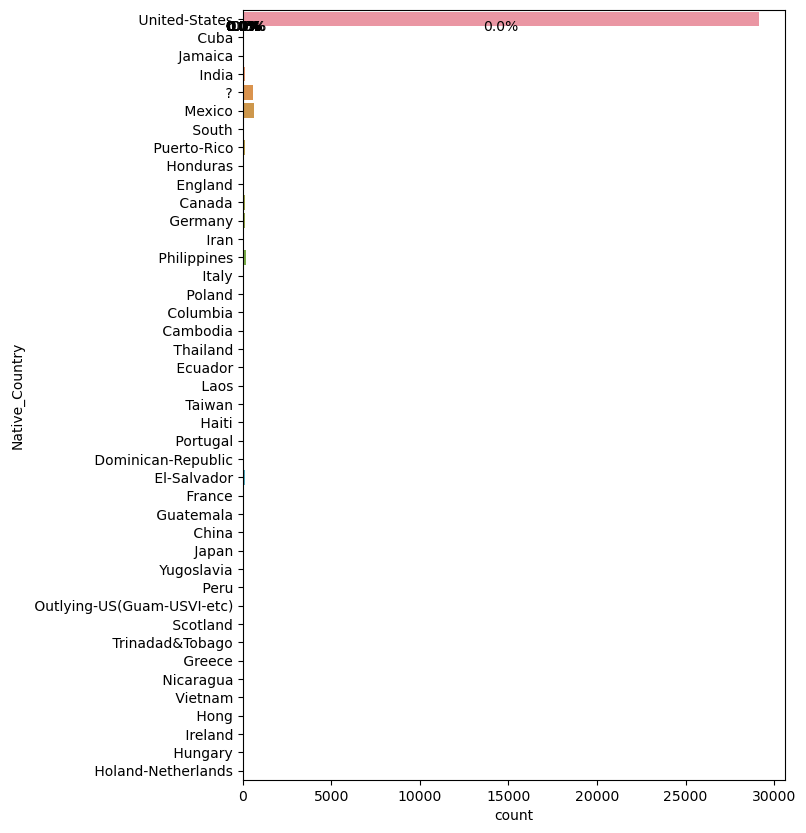

In [48]:
fig, ax = plt.subplots(figsize= (7, 10))
ax = sns.countplot(y = df["Native_Country"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

#### Maximum number of workforce is from United States and very few are from Mexico.

## 9.  Visual presentation of Income Bracket attribute

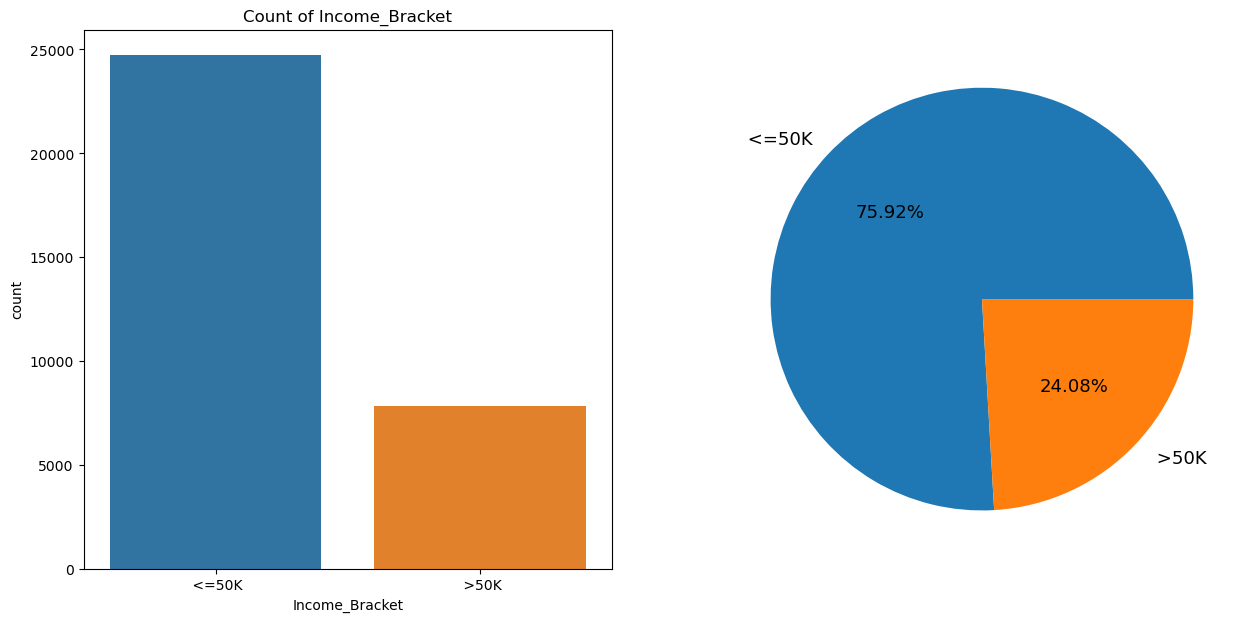

In [50]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Income_Bracket")                  
percentage = df["Income_Bracket"].value_counts()         
labels = list(df["Income_Bracket"].value_counts().index) 

sns.countplot(x = df["Income_Bracket"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})   
plt.show()

#### 75.92% if the workforce come under income bracket of less than or equal to 50K. 24.08% of the workforce has salary greater than 50K.

# Task 5

# $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical \ Variables$$

## User defined function for calculating mean, median, mode,  standard deviation, count of all null values and show the skewness of data

In [51]:
from scipy.stats import skew

def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")
    print(f"The Skewness of the {col} is {df[col].skew()}")

## 1.  Analysis of Employee Age Column


In [52]:
info_of_numerical("Age")

The mean of the Age is 38.58164675532078
The median of the Age is 37.0
The mode of the Age is 36
The standard deviation of the Age is 13.640432553581146
Number of missing values in the Age is 0
The Skewness of the Age is 0.5587433694130484


## 2.  Analysis of Hours Per Week Column


In [53]:
info_of_numerical("Hours_Per_Week")

The mean of the Hours_Per_Week is 40.437455852092995
The median of the Hours_Per_Week is 40.0
The mode of the Hours_Per_Week is 40
The standard deviation of the Hours_Per_Week is 12.34742868173081
Number of missing values in the Hours_Per_Week is 0
The Skewness of the Hours_Per_Week is 0.22764253680450092


# Task 6

## 1. Descriptive Analysis of Employee Age Column using graph


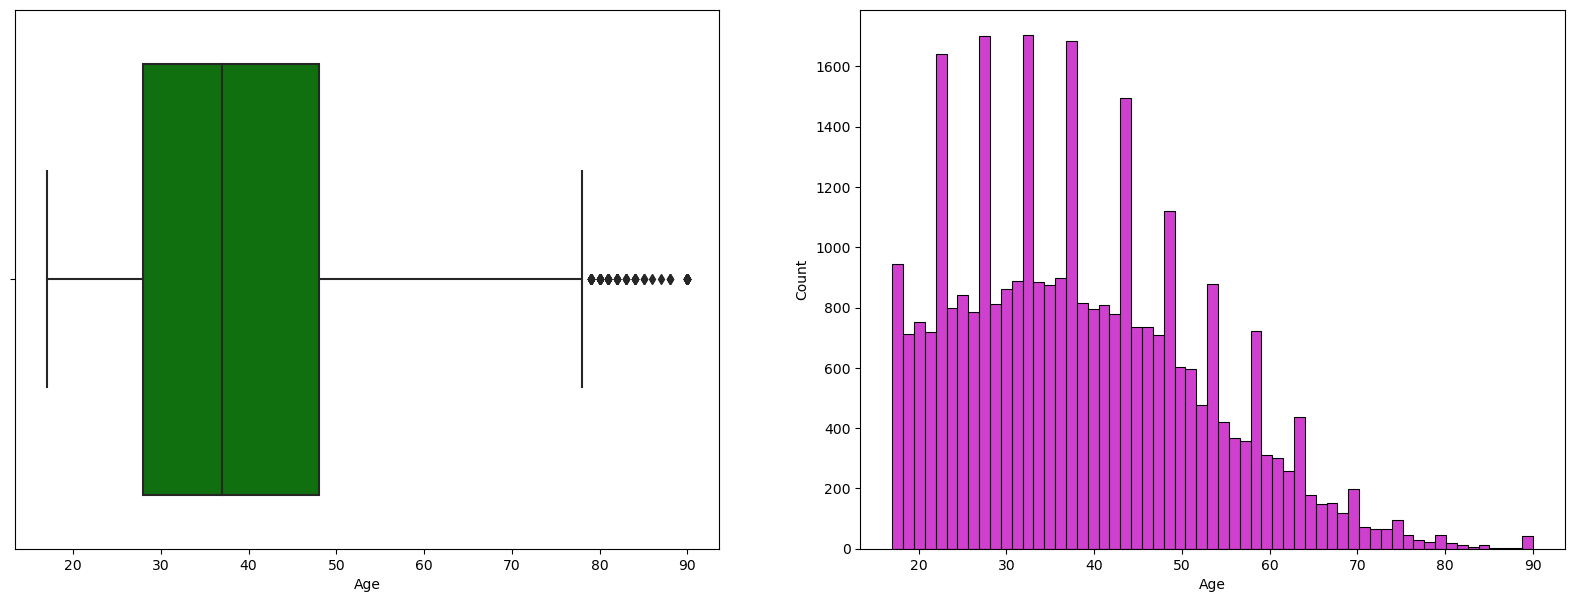

In [54]:
# Distribution of Employee_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Age"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Age"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

#### In this case, the employee age is distributed normally and is slightly right skewed. Maximum number of workforce lies between 18 to 50 Age group.


## 2. Descriptive Analysis of Hours Per Week Column using graph


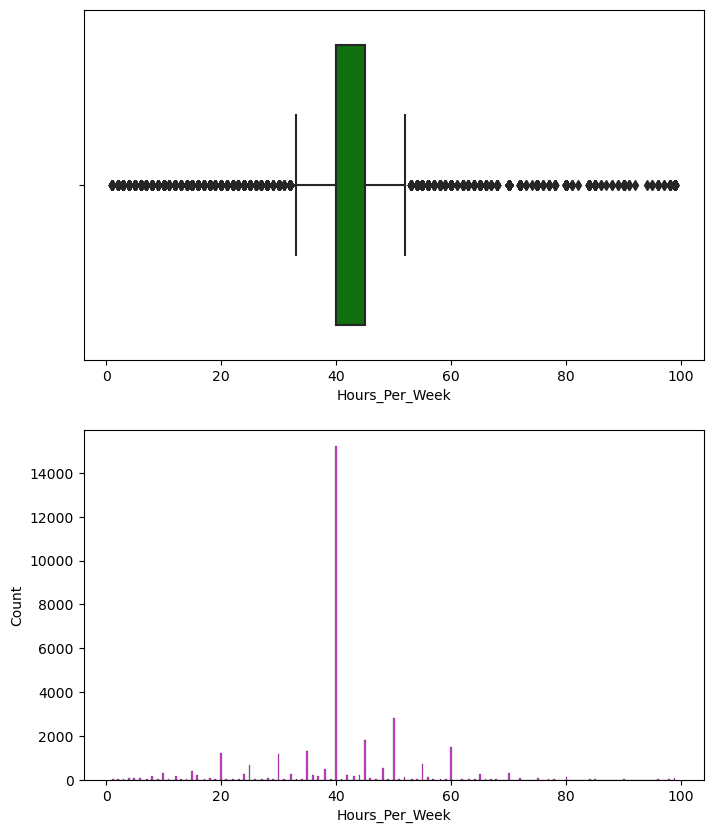

In [56]:
# Distribution of Employee_Age
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))              # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Hours_Per_Week"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Hours_Per_Week"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

##### Most of the employees work for atleast 40 hours per week. The outliers are not human error as some of the employees could be working for lesser/longer hours considering the spread of occupation type.